# Data Cleaning

## Resumen de los datos. Dimensiones y estructura

In [2]:
import pandas as pd
import numpy as np

In [53]:
data = pd.read_csv('../python-ml-course/datasets/titanic/titanic3.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#### Dimensión del dataset
data.shape

(1309, 14)

In [4]:
### nombre de las columnas

data.columns.values.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

Para obtener un resumen de los estadísticos básicos de las columnas numéricas.

In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Missing values

Calculamos los valores nulos para las columnas que presenten datos faltantes.

In [10]:
nullsBody = pd.isnull(data.body).sum()
notNullsBody = pd.notnull(data.body).sum()
print(f'los datos de la columna Body se son: nulos: {nullsBody}, no nulos: {notNullsBody}')

los datos de la columna Body se son: nulos: 1188, no nulos: 121


Los valores que faltan en un dataset pueden venir por varias razones:
* incorrecto proceso de extracción de los datos desde la fuente
* recolección de los datos incompleta

## Enfoques
### Borrado de valores que faltan

In [21]:
# Borrado de filas cuando todos sus valores son NA con how = "all"

data.dropna(axis=0, how='all',inplace=True)
data.shape

(1309, 14)

Para no dañar el dataset con la siguiente indicación, realizaremos una copia del dataset original.

In [12]:
data2 = data

In [14]:
# Borrando filas cuando alguno de sus datos en cualquier columna es NA (NO RECOMENDADO)
data2.dropna(axis=0, how='any', inplace=True)
data2.shape

(0, 14)

### Computo de valores faltantes

In [54]:
data3 = data

In [55]:
data3.fillna(0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,0,C,0,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,0.0000,1,0,2665,14.4542,0,C,0,0.0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,0,C,0,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,0,C,0,0.0,0


In [26]:
data4 = data

In [28]:
#llenar los na con una palabra en partucular

data4.fillna('Desconocido')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,Desconocido,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,Desconocido,C,Desconocido,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,Desconocido,1,0,2665,14.4542,Desconocido,C,Desconocido,Desconocido,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,Desconocido,C,Desconocido,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,Desconocido,C,Desconocido,Desconocido,Desconocido


In [29]:
data5 = data

In [31]:
data5['body'].fillna(0, inplace = True)
data5['home.dest'].fillna('Desconocido', inplace=True)
data5.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,0.0,Desconocido


Ahora vamos a inputar los valores faltantes con la media, o algun estadistico que haga sentido para completar los datos.

In [33]:
print(f'Datos nulos de la columna "Age": {data5.age.isnull().sum()}')

Datos nulos de la columna "Age": 263


In [34]:
data5['age'].fillna(data.age.mean(), inplace= True)
data5.age

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

### Dummy variables

Proceso de transformar variables categóricas en variables continuas que puedan ser evaluadas en algun modelo de analisis. Para ejemplificar este proceso con los datos que se estan trabajando del dataset del titanic, utilizaremos la columna "sex".

In [37]:
data.sex

SyntaxError: incomplete input (2245417186.py, line 1)

In [38]:
data.sex.describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [39]:
dummy_sex = pd.get_dummies(data['sex'], prefix='sex')

In [41]:
dummy_sex.head()

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


Una vez completada la dumificación de las variables categóricas requeridas por el modelo, se debe proceder a eliminar la columna origen de las variables dummy, y continuar con la indexación de las nuevas columnas.

In [44]:
nombre_columnas = data.columns.values.tolist()
nombre_columnas

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [48]:
data.drop(['sex'], axis = 1, inplace=True)
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


In [49]:
data = pd.concat([data, dummy_sex], axis=1)

In [50]:
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


Para simplificar este proceso, vamos a crear una función a la que pueda recurrir constantemente, para crear variables dummy a conveniencia.

In [51]:
def crearDummies(data, columnas):
    '''
    Esta función facilita la creación de variables dummy en un dataset, especificando el dataset y las columnas a convertir

    data: type(DataFrame)
    columnas: type(list), lista de columnas a transformar

    Autor:Manuel Alejandro Pacheco Murcia
    
    '''

    import pandas as pd
    dummy = pd.get_dummies(data[columnas], prefix=columnas)
    data = data.drop(columnas, axis=1)
    data = pd.concat([data, dummy], axis=1)
    return data

In [56]:
crearDummies(data3, 'sex')

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


## Representaciones gráficas

La representación gráfica es una de las herramientas más utilizadas para el analisis exploratorio de datos, y así poder identificar posibles comportamientos atipicos de una manera sencilla.

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
import matplotlib.pyplot as plt

### Scatterplot

Aunque la cantidad de gráficos que se pueden realiza es muy grande, siempre es bueno iniciar con aquellas gráficas que pueden generar alguna correlación fuerte para  nuestro modelo.

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Relación de la duración en minutos de las llamadas Vs. La carga del dispositivo')

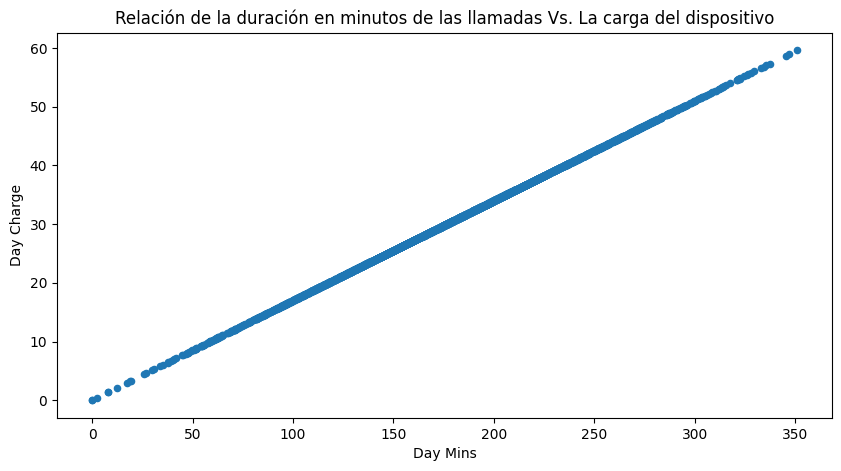

In [44]:
data.plot(kind='scatter', x = 'Day Mins', y = 'Day Charge', figsize=(10,5))
plt.title('Relación de la duración en minutos de las llamadas Vs. La carga del dispositivo')

Ahora, vamos a ilustrar varios gráficos al mismo tiempo, enmarcados en una figura de dimensiones $(m,n)$.

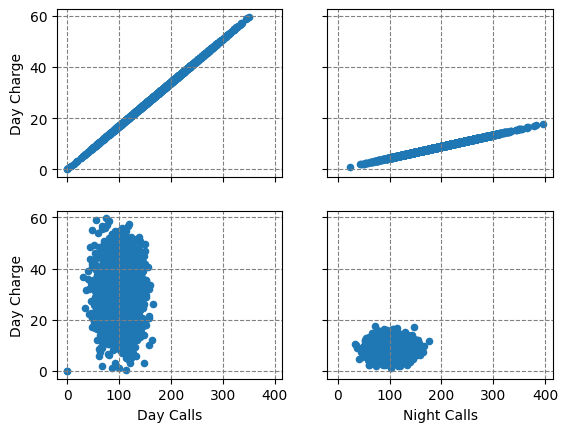

In [45]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
data.plot(kind='scatter', x = 'Day Mins', y = 'Day Charge', ax=axs[0][0]).grid(visible=True, linestyle = '--', color='grey')
data.plot(kind='scatter', x = 'Night Mins', y = 'Night Charge', ax=axs[0][1]).grid(visible=True, linestyle = '--', color='grey')
data.plot(kind='scatter', x = 'Day Calls', y = 'Day Charge', ax=axs[1][0]).grid(visible=True, linestyle = '--', color='grey')
data.plot(kind='scatter', x = 'Night Calls', y = 'Night Charge', ax=axs[1][1]).grid(visible=True, linestyle = '--', color='grey')

Tambien podemos usar la libreria **seaborn** para afinar y estilizar los gráficos.

In [32]:
import seaborn as sns

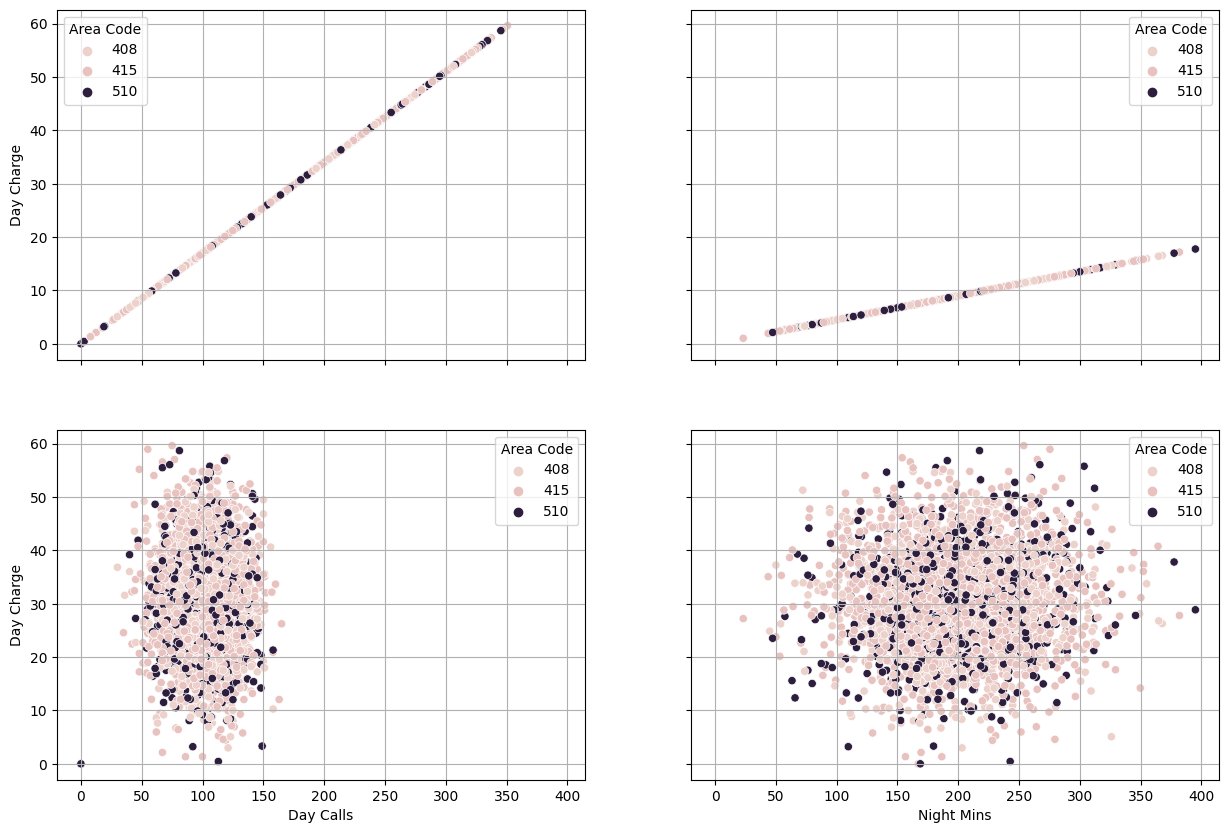

In [46]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize = (15,10))
sns.scatterplot(data, x = "Day Mins", y="Day Charge", hue="Area Code", ax=axs[0][0]).grid()
sns.scatterplot(data, x = "Night Mins", y="Night Charge", hue="Area Code", ax=axs[0][1]).grid()
sns.scatterplot(data, x = "Day Calls", y="Day Charge", hue="Area Code", ax=axs[1][0]).grid()
sns.scatterplot(data, x = "Night Mins", y="Day Charge", hue="Area Code", ax=axs[1][1]).grid()

### Histograma de frecuencias acumuladas

Es el gráfico mas utilizado para entender sobre que rango de valores, o sobre que rango intercuartilico se agrupan los datos, y asi poder identificar datos que se comportan de acuerdo a una distribución de probabilidad **nomal**.

Text(0.5, 1.0, 'Histograma de frecuencias para "Day Calls"')

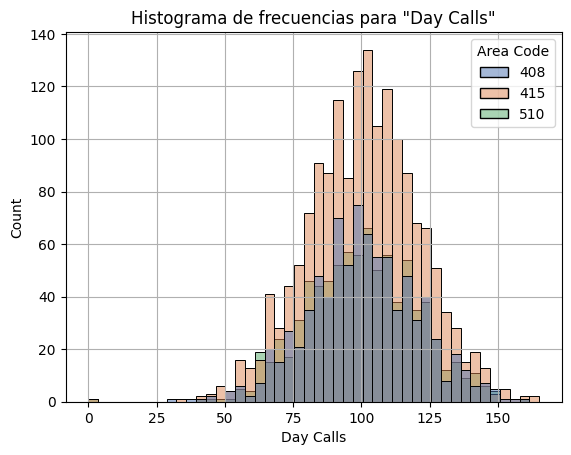

In [41]:
sns.histplot(data, x = 'Day Calls', hue='Area Code', palette= 'deep').grid()
plt.title('Histograma de frecuencias para "Day Calls"')


### Boxpolot o diagrama de cajas y bigotes

El boxplot es una de las mejores formas de entender la distribución de los datos de una variable numerica, con respecto a una categoría, ya que agrupa los datos en cuantiles, y evidencia los puntos mas extremos que pueden ser considerados como outliers.

<AxesSubplot: xlabel='Area Code', ylabel='Day Calls'>

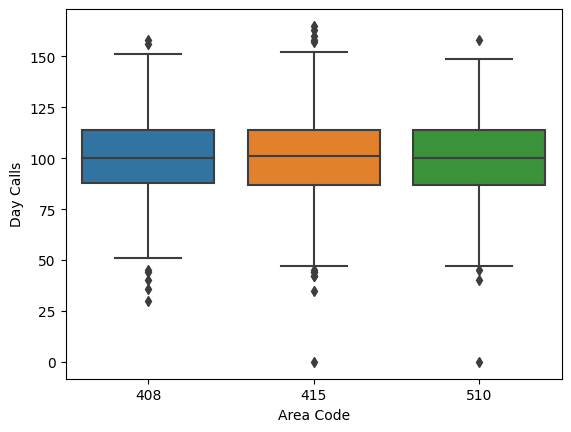

In [47]:
sns.boxplot(data, x= 'Area Code', y = 'Day Calls')